In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from GP_comp.GP import generate_grids
from SGLD_v7 import SgldBayesianRegression as V7
from models.stgp_neural_network import STGPNeuralNetwork
from simulate_single_modality import simulate_data
from utils import generate_linear_data, plot_mse, plot_sigma_squared, calculate_p_hat, plot_image

import pickle

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)


Simulated 20000 images of 10×10 = 100 pixels true_sigma2=0.0


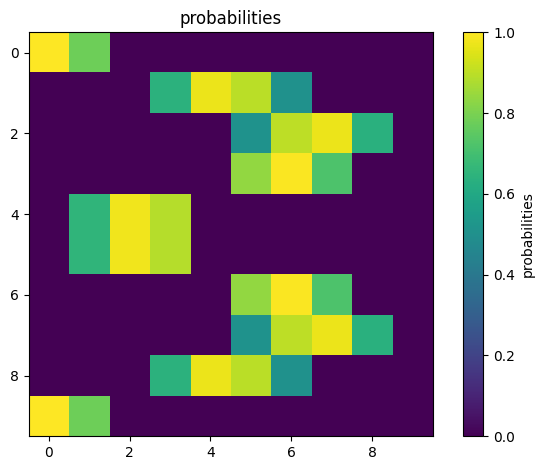

In [2]:
# Step 2: Generate synthetic data
# simulate a batch of images
in_feature = 10
r2 = 1.0                  # signal-to-noise ratio
n = 20000                  # number of images/samples
grids, true_beta, img, Y, true_sigma2 = simulate_data(n=n, r2=r2, dim=in_feature, random_seed=42)
# torch tensors

# pick one of your simulated images
print(f"Simulated {n} images of {in_feature}×{in_feature} = {img.shape[1]} pixels true_sigma2={true_sigma2}")
plot_image(true_beta)
X = torch.from_numpy(img).float().to('cpu')    # X.shape= (number of rows, total number of vexels)
y = torch.from_numpy(Y).float().to('cpu')      # y.shape= (number of rows,)

In [3]:
p_hats = []
for i, nu_tilde in enumerate([0.5, 1, 1.5, 2, 5, 7.5]):
    p_hats.append([])
    for j, b_for_eigen in enumerate([10.0, 20.0, 30.0, 40.0, 80.0]):
        size = os.path.getsize(f"tilda{nu_tilde}_bForEigen{b_for_eigen}.pkl")
        print(f"tilda{nu_tilde}_bForEigen{b_for_eigen}.pkl size={size}")
        if size:
            with open(f"tilda{nu_tilde}_bForEigen{b_for_eigen}.pkl", "rb") as f:
                loaded = pickle.load(f)
            beta_samples = loaded['beta'][-1000:-1]
            p_hat = calculate_p_hat(beta_samples)
            p_hats[i].append(p_hat)
        else:
            p_hats[i].append(np.array([]))

tilda0.5_bForEigen10.0.pkl size=0
tilda0.5_bForEigen20.0.pkl size=34937008
tilda0.5_bForEigen30.0.pkl size=34937008
tilda0.5_bForEigen40.0.pkl size=34937008
tilda0.5_bForEigen80.0.pkl size=34937008
tilda1_bForEigen10.0.pkl size=34937008
tilda1_bForEigen20.0.pkl size=34937008
tilda1_bForEigen30.0.pkl size=34937008
tilda1_bForEigen40.0.pkl size=34937008
tilda1_bForEigen80.0.pkl size=34937008
tilda1.5_bForEigen10.0.pkl size=34937008
tilda1.5_bForEigen20.0.pkl size=34937008
tilda1.5_bForEigen30.0.pkl size=34937008
tilda1.5_bForEigen40.0.pkl size=34937008
tilda1.5_bForEigen80.0.pkl size=34937008
tilda2_bForEigen10.0.pkl size=34937008
tilda2_bForEigen20.0.pkl size=34937008
tilda2_bForEigen30.0.pkl size=34937008
tilda2_bForEigen40.0.pkl size=34937008
tilda2_bForEigen80.0.pkl size=34937008
tilda5_bForEigen10.0.pkl size=34937008
tilda5_bForEigen20.0.pkl size=34937008
tilda5_bForEigen30.0.pkl size=34937008
tilda5_bForEigen40.0.pkl size=34937008
tilda5_bForEigen80.0.pkl size=34937008
tilda7.5_bFo

In [4]:
import matplotlib.pyplot as plt
import math

def plot_images_grid(images, labels=None, titles=None):
    """
    Plot a grid of images from a list of lists.
    
    Args:
        images: list of lists of images, shape [nrows][ncols]
        labels: list of lists of colorbar labels (optional)
        titles: list of lists of titles (optional)
    """
    nrows = len(images)
    ncols = len(images[1])

    fig, axes = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))

    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i, j]
            img = images[i][j]

            # reshape if it's flat
            if len(img.shape) == 1:
                side_length = int(math.sqrt(img.shape[0]))
                img = img.reshape(side_length, side_length)

            # show image
            im = ax.imshow(img, interpolation="nearest")

            # add colorbar
            cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            if labels is not None:
                cbar.set_label(labels[i][j])

            if titles is not None:
                ax.set_title(titles[i][j], fontsize=8)

            ax.axis("off")

    plt.tight_layout()
    plt.show()


/var/folders/dx/dg45fpkn2dz388myjglv0d_h0000gn/T/ipykernel_85273/1950871991.py:29: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(img, interpolation="nearest")
/var/folders/dx/dg45fpkn2dz388myjglv0d_h0000gn/T/ipykernel_85273/1950871991.py:29: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = ax.imshow(img, interpolation="nearest")


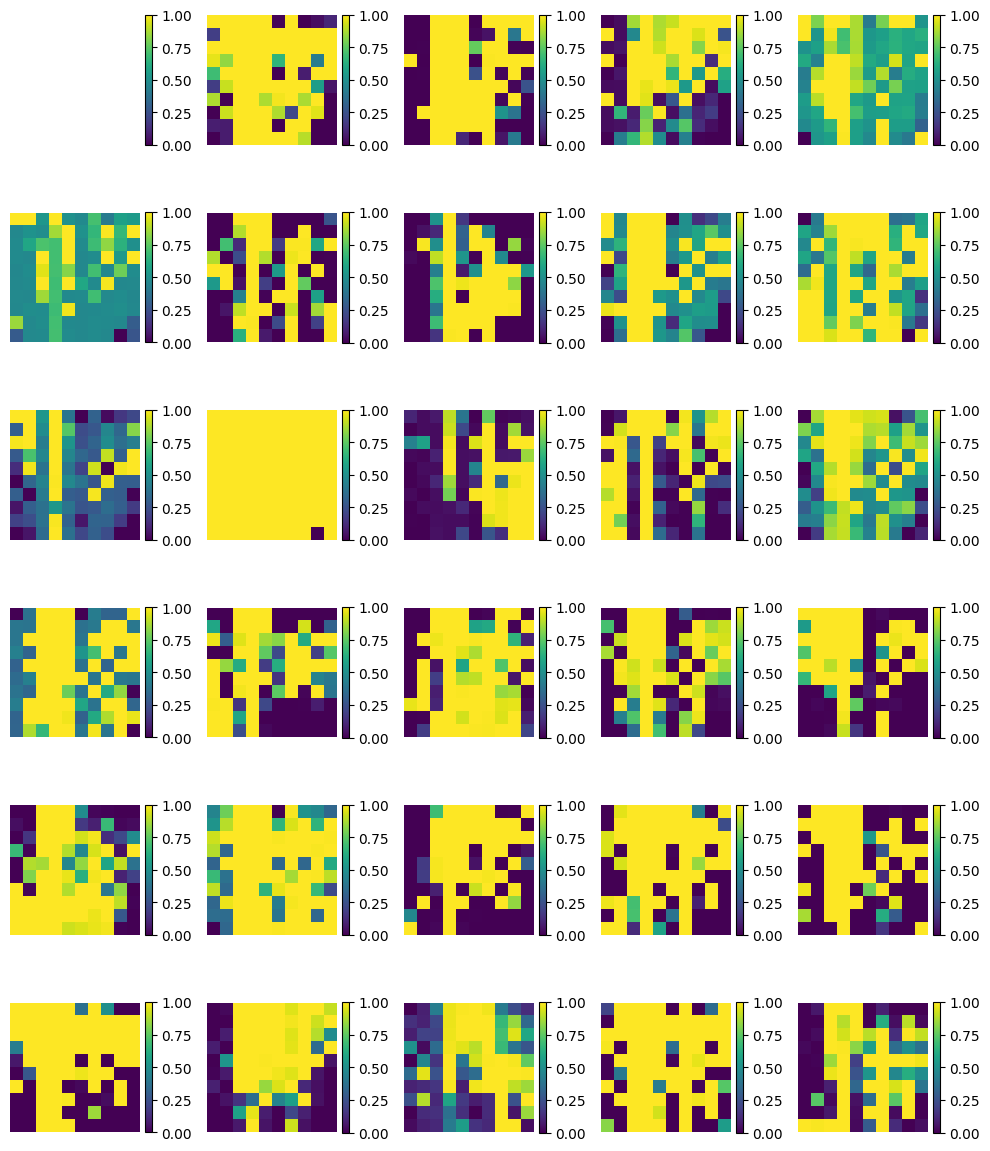

In [5]:
plot_images_grid(p_hats)

In [6]:
len(p_hats) 

6